In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mall_data.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


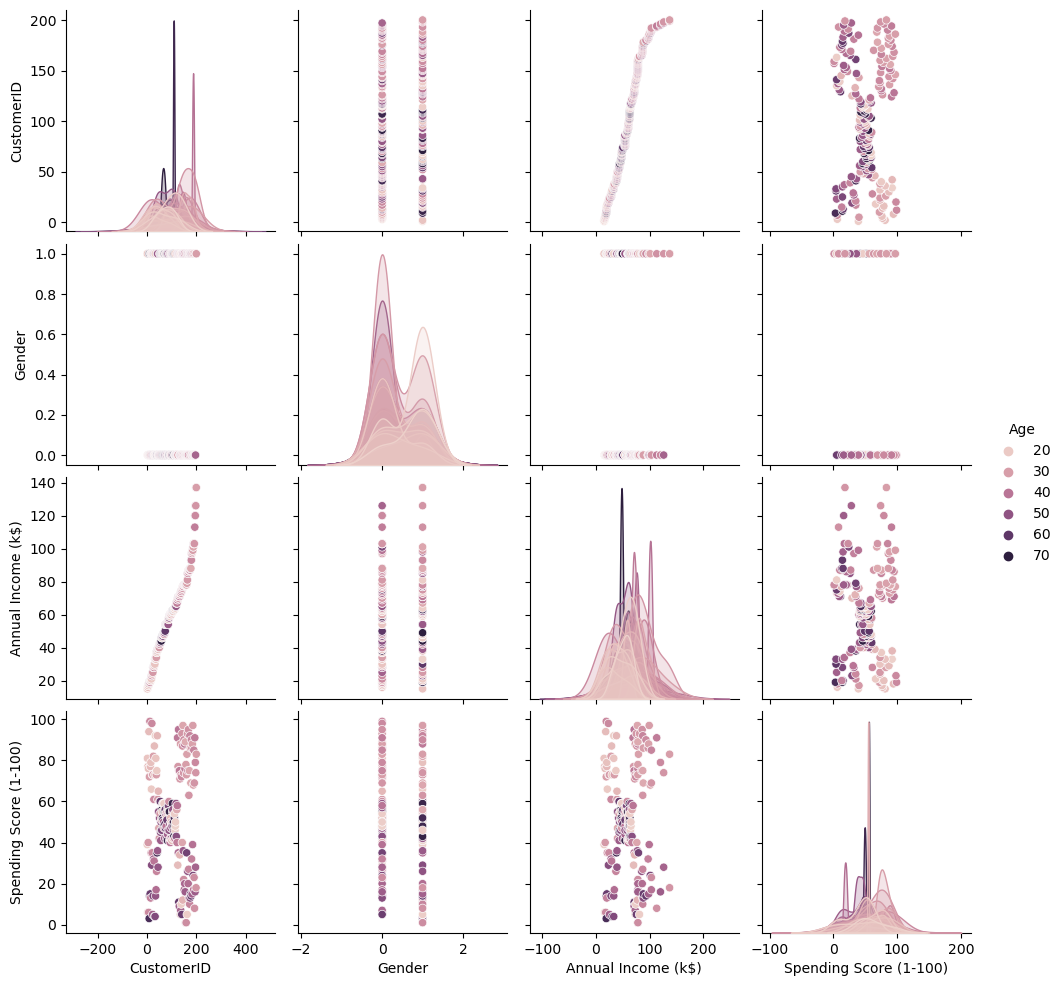

In [8]:
import matplotlib.pyplot as plt
sns.pairplot(data = df, hue = "Age")
plt.show()

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gmo = GaussianMixture(n_components=2, random_state=0)
gm = gmo.fit(df)

In [13]:
gm.means_

array([[177.85605263,   0.37357022,  35.8479816 ,  96.35649546,
         54.11455326],
       [ 81.54631836,   0.45627654,  39.58555073,  51.7891882 ,
         49.24086114]])

In [14]:
gm.bic(df)

7074.348450127749

In [17]:
bics = {
    "i": [],
    "bic": []
}
for i in range(2,20):
    gmo = GaussianMixture(n_components=i, random_state=0)
    gm = gmo.fit(df)
    bic = gm.bic(df)
    bics["i"].append(i)
    bics["bic"].append(bic)

In [18]:
print(bics)

{'i': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'bic': [7074.348450127749, 6874.500730374816, 6854.219666974952, 6896.880426722901, 6886.392664078027, 6943.856339839289, 7001.418397305111, 7069.455154897917, 7126.970099698345, 7162.882199514904, 7202.414553581303, 7273.6541838113935, 7344.911782663064, 7271.783296587864, 7361.0717573734055, 7429.013403730783, 7481.754337293469, 7448.7490498281095]}


In [19]:
min(bics["bic"])

6854.219666974952

In [23]:
gmo = GaussianMixture(n_components=3, random_state=0)
gm = gmo.fit(df)

In [24]:
predict = gm.predict(df)

In [25]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [28]:
df.insert(2, "Predict", predict, True)

In [29]:
df.head()

,CustomerID,Gender,Predict,Predict,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,1,19,15,39
1,2,1,1,1,21,15,81
2,3,0,1,1,20,16,6
3,4,0,1,1,23,16,77
4,5,0,1,1,31,17,40


In [36]:
#hue = "Predict"
sns.scatterplot(data = df, x = 'Age', y = "Spending Score (1-100)")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>